In [3]:
import numpy as np
from sympy import *
import pandas as pd
init_printing(use_unicode=True,use_latex=True)
def rrstr(x,n=4): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams

## 1

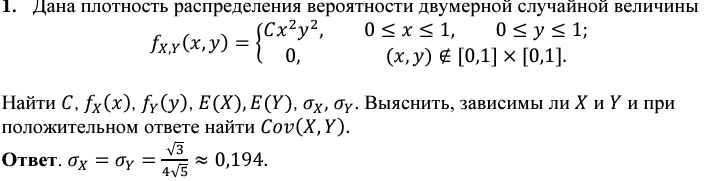

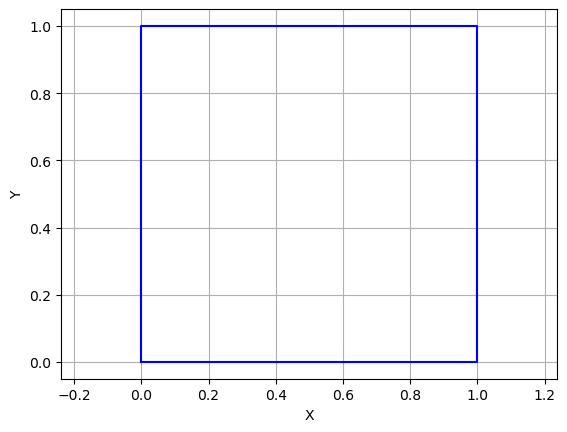

In [4]:
x = [0, 0, 1,1,0]
y = [0, 1, 1,0,0]
plt.plot(x, y, marker=' ', linestyle='-', color='blue')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)
plt.axis('equal')
plt.show() 

In [5]:
x,y,C = symbols('x y C',real=True)
f = C*x**2*y**2

F_XY = integrate(f,(x,0,1),(y,0,1))
C0 = solve(F_XY-1,C)[0]
f=f.subs(C,C0)

f_x = integrate(f,(y,0,1))
f_y = integrate(f,(x,0,1))

EX = integrate(f_x*x,(x,0,1))
EY = integrate(f_y*y,(y,0,1))

EX2 = integrate(f_x*x**2,(x,0,1))
EY2 = integrate(f_y*y**2,(y,0,1))

VarX = EX2 - EX**2
VarY = EY2 - EY**2

sig_x = sqrt(VarX)
sig_y = sqrt(VarY)

inner = integrate(f*x*y,(x,0,1))
EXY = integrate(inner,(y,0,1))
EXY

COVXY=EXY-EX*EY

RHOXY=COVXY/(sig_x*sig_y)

ruz = pd.DataFrame(np.array('C0,f_x,f_y,EX,EY,VARX,VARY,sig_x,sig_y,COVXY,RHOXY,Независимы?'.split(',')))

ruz[1] = np.array([C0,f_x,f_y,EX, EY, VarX,VarY,rrstr(sig_x,3),rrstr(sig_y,3),COVXY,RHOXY,f_x * f_y == f])

ruz

,0,1
0,C0,9
1,f_x,3*x**2
2,f_y,3*y**2
3,EX,3/4
4,EY,3/4
5,VARX,3/80
6,VARY,3/80
7,sig_x,"0,194"
8,sig_y,"0,194"
9,COVXY,0


## 2

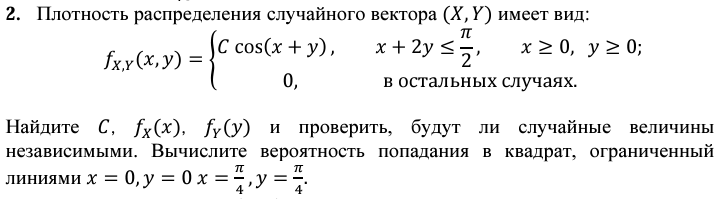

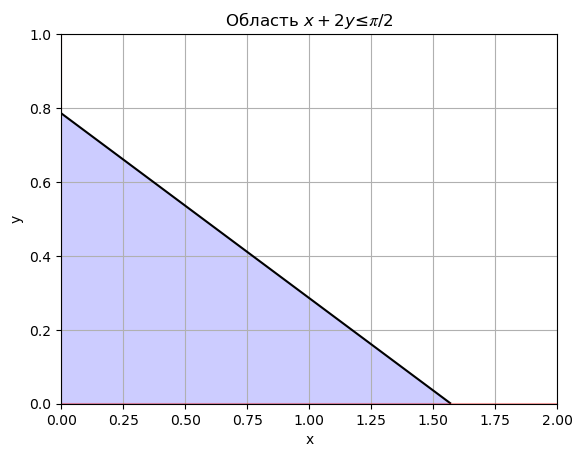

In [6]:
x = np.linspace(0, 2, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)
Z = X + 2*Y
plt.contourf(X, Y, Z, levels=[0, pi/2], colors='blue', alpha=0.2)
plt.contour(X, Y, Z, levels=[0,pi/2], colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Область $x+2y≤𝜋/2$')
plt.grid(True)

plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)

plt.show()

In [7]:
x,y,C = symbols('x y C',real=True)
f = C*cos(x+y)

F_XY = integrate(f,(y,0,pi/4-x/2),(x,0,pi/2))
C0 = solve(F_XY-1,C)[0]
f=f.subs(C,C0)

f_x = integrate(f,(y,0,pi/4-x/2))
f_y = integrate(f,(x,0,pi/2-y*2))

EX = integrate(f_x*x,(x,0,pi/2))
EY = integrate(f_y*y,(y,0,pi/4))

EX2 = integrate(f_x*x**2,(x,0,pi/2))
EY2 = integrate(f_y*y**2,(y,0,pi/4))

VarX = EX2 - EX**2
VarY = EY2 - EY**2

sig_x = sqrt(VarX)
sig_y = sqrt(VarY)

EXY = integrate(f*x*y,(x,0,pi/2-y*2),(y,0,pi/4))
EXY

COVXY=EXY-EX*EY

RHOXY=COVXY/(sig_x*sig_y)

P_ = integrate(f,(y,0,pi/4 - 1/2 * x),(x,0,pi/4)).evalf()

ruz = pd.DataFrame(np.array('C0,f_x,f_y,EX,EY,VARX,VARY,sig_x,sig_y,COVXY,RHOXY,Независимы?,P(0<=x<=pi/4;0<=y<=pi/4)'.split(',')))

ruz[1] = np.array([rrstr(C0),f_x,f_y.evalf(),rrstr(EX), rrstr(EY), rrstr(VarX),rrstr(VarY),rrstr(sig_x),rrstr(sig_y),rrstr(COVXY),rrstr(RHOXY),f_x * f_y == f,rrstr(P_)])

ruz

,0,1
0,C0,"2,4142"
1,f_x,-(1 + sqrt(2))*sin(x) + (1 + sqrt(2))*sin(x/2 ...
2,f_y,-2.41421356237309*sin(y) + 2.41421356237309*co...
3,EX,"0,4142"
4,EY,"0,2673"
5,VARX,"0,0966"
6,VARY,"0,0346"
7,sig_x,"0,3108"
8,sig_y,"0,1860"
9,COVXY,"-0,0234"


## 3

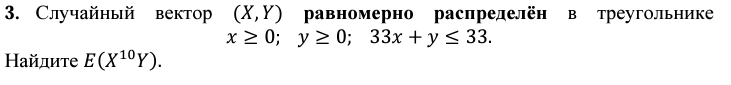

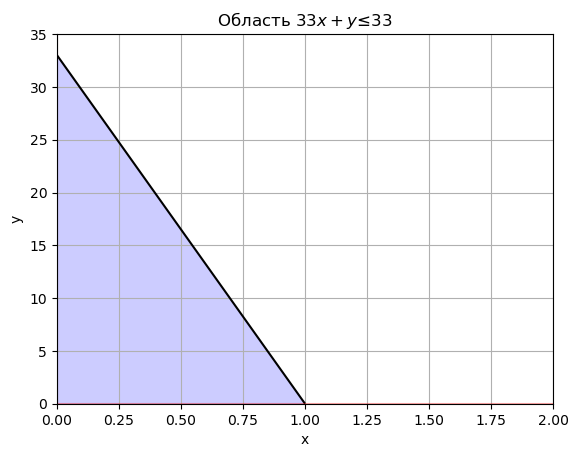

In [8]:
x = np.linspace(0, 2, 500)
y = np.linspace(0, 35, 500)
X, Y = np.meshgrid(x, y)
Z = X*33 + Y
plt.contourf(X, Y, Z, levels=[0, 33], colors='blue', alpha=0.2)
plt.contour(X, Y, Z, levels=[0,33], colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Область $33x+y≤33$')
plt.grid(True)

plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)

plt.show()

In [9]:
x,y = symbols('x y',real=True)

f = 1/integrate(1,(y,0,33-33*x),(x,0,1))

EX10Y = integrate(f* x**10 * y,(y,0,33-33*x),(x,0,1))
EX10Y

## 4


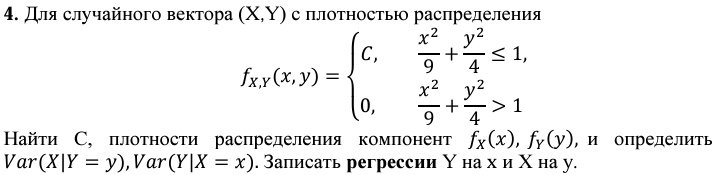

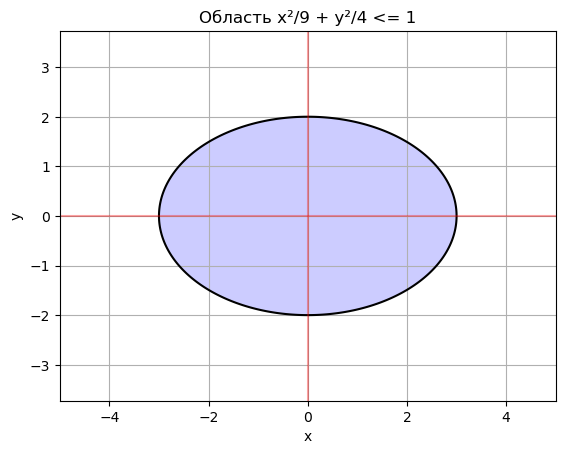

In [10]:
x = np.linspace(-5, 5, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = X**2/9 + Y**2/4
plt.contourf(X, Y, Z, levels=[0, 1], colors='blue', alpha=0.2)
plt.contour(X, Y, Z, levels=[1], colors='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Область x²/9 + y²/4 <= 1')
plt.grid(True)
plt.axis('equal')
plt.axvline(x=0, color='r', alpha=0.35)
plt.axhline(y=0, color='r', alpha=0.35)
plt.axis('equal')
plt.show()

'C='

'f_x ='

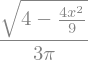

'f_y ='

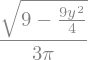

'EX_Y='

'EY_X='

'VarX_Y='

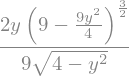

'VarY_X='

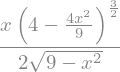

In [11]:
x, y, C, r, phi, J = symbols('x y C r phi J',real=True)
f = C
x = 3*r*cos(phi)
y = 2*r*sin(phi)
J = 2*3*r

integ = integrate(J*f,(phi,0,pi*2),(r,0,1))
C0 = solve(integ-1,C)[0]
f=f.subs(C,C0)

display('C=',C0)

x,y = symbols('x y',real=True)
f_y = integrate(f,(x,-sqrt(9*(1-y**2 /4)),sqrt(9*(1-y**2 /4))))
f_x = integrate(f,(y,-sqrt(4*(1-x**2 /9)),sqrt(4*(1-x**2 /9))))

display('f_x =',f_x)
display('f_y =',f_y)

f_x_y = f/f_y
EX_Y = integrate( x*y*f_x_y,(x,-sqrt(9*(1-y**2 /4)),sqrt(9*(1-y**2 /4))))
EX2_Y = integrate( x**2 *y*f_x_y,(x,-sqrt(9*(1-y**2 /4)),sqrt(9*(1-y**2 /4))))

display('EX_Y=',EX_Y)

f_y_x = f/f_x
EY_X = integrate( x*y*f_y_x,(y,-sqrt(4*(1-x**2 /9)),sqrt(4*(1-x**2 /9))))
EY2_X = integrate( x* y**2 *f_y_x,(y,-sqrt(4*(1-x**2 /9)),sqrt(4*(1-x**2 /9))))

display('EY_X=',EY_X)

VarX_Y = EX2_Y - EX_Y**2
VarY_X = EY2_X - EY_X**2

display('VarX_Y=',VarX_Y)
display('VarY_X=',VarY_X)

## 5

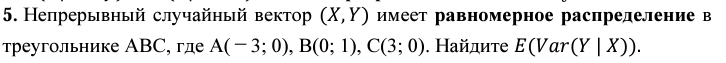

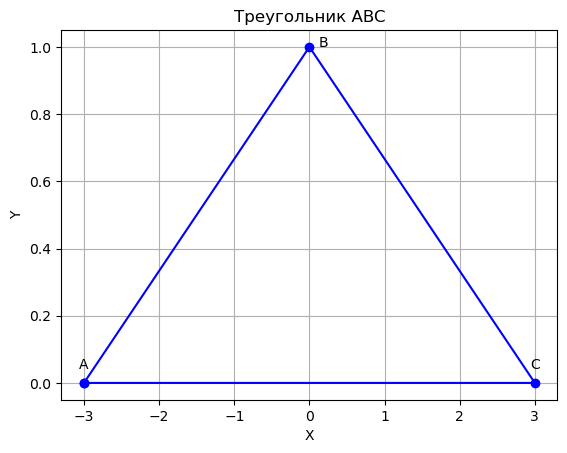

In [12]:
x = [-3, 0, 3,-3]
y = [0, 1, 0,0]
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Треугольник ABC')
plt.grid(True)
plt.annotate('A', (-3, 0), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate('B', (0, 1), textcoords="offset points", xytext=(10, 0), ha='center')
plt.annotate('C', (3, 0), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show() 

In [22]:
x,y = symbols('x y', real=True)
f = 1/(integrate(1,(y,0,1/3 *x + 1),(x,-3,0)) + integrate(1,(y,0,-1/3 *x + 1),(x,0,3)))

f_x1 = integrate(f,(y,0,1/3 *x + 1))
f_x2=  integrate(f,(y,0,-1/3 *x + 1))

f_y_x1 = f/f_x1
f_y_x2 = f/f_x2


EY_X1 = integrate(y * f_y_x1, (y, 0, x / 3 + 1))
EY_X2=integrate(y * f_y_x2, (y, 0, -x / 3 + 1))

VarY_X1 =integrate((y - EY_X1) ** 2 * f_y_x1, (y, 0, x / 3 + 1))
VarY_X2 =integrate((y - EY_X2) ** 2 * f_y_x2, (y, 0, -x / 3 + 1))



EVarY_X = integrate(VarY_X1 * f_x1, (x, -3, 0)) + integrate(VarY_X2 * f_x2, (x, 0, 3)) 


EVarY_X

In [23]:
1/24